In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
zomato=pd.read_csv("/kaggle/input/zomato-restaurants/zomato_restaurants_in_India.csv")

In [3]:
zomato.shape

(211944, 26)

In [4]:
zomato.head(10)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
6,3400296,Honeydew Restaurant,['Quick Bites'],https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,Very Good,647,46,0.0,1,-1
7,3400368,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,Good,617,18,0.0,-1,-1
8,3401284,Cake House,['Bakery'],https://www.zomato.com/agra/cake-house-2-civil...,"23/301, Wazirpura Rd, Judge Compound Chowraha,...",Agra,34,Civil Lines,27.204148,78.009025,...,2,Rs.,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,Average,322,14,0.0,1,-1
9,3400838,Sugar N Thyme,['Café'],https://www.zomato.com/agra/sugar-n-thyme-tajg...,"1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...",Agra,34,Tajganj,27.158243,78.045591,...,3,Rs.,"['No Alcohol Available', 'Dinner', 'Delivery',...",4.4,Very Good,289,324,0.0,1,-1


In [5]:
zomato.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

> **LETS REMOVE UNWANTED COLUMNS**


In [6]:
zomato.drop(columns=(['res_id','name','name','url','address','city_id','locality','price_range','currency','highlights','aggregate_rating','votes','photo_count','opentable_support','delivery','takeaway']),inplace=True)

In [7]:
zomato.shape

(211944, 11)

> **Removing Missing Value**

In [8]:
zomato_clean=zomato.dropna()

In [9]:
zomato_clean.isnull().sum() #no missing values now

establishment           0
city                    0
latitude                0
longitude               0
zipcode                 0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
rating_text             0
dtype: int64

In [10]:
#ESTABLISHMENT 

In [11]:
zomato_clean['establishment'].head()

1    ['Quick Bites']
2    ['Quick Bites']
3    ['Quick Bites']
6    ['Quick Bites']
9           ['Café']
Name: establishment, dtype: object

In [12]:
zomato_clean['establishment'].unique()

array(["['Quick Bites']", "['Café']", "['Casual Dining']",
       "['Bhojanalya']", "['Food Truck']", "['Sweet Shop']",
       "['Fine Dining']", "['Bakery']", '[]', "['Beverage Shop']",
       "['Dessert Parlour']", "['Dhaba']", "['Kiosk']", "['Food Court']",
       "['Confectionery']", "['Bar']", "['Paan Shop']", "['Pub']",
       "['Lounge']", "['Microbrewery']", "['Club']", "['Mess']",
       "['Butcher Shop']", "['Cocktail Bar']", "['Irani Cafe']"],
      dtype=object)

In [13]:
# zomato_clean['establishment'] = zomato_clean['establishment'].str.replace("[^a-zA-Z#]", "")

In [14]:
zomato_clean['establishment'].unique()

array(["['Quick Bites']", "['Café']", "['Casual Dining']",
       "['Bhojanalya']", "['Food Truck']", "['Sweet Shop']",
       "['Fine Dining']", "['Bakery']", '[]', "['Beverage Shop']",
       "['Dessert Parlour']", "['Dhaba']", "['Kiosk']", "['Food Court']",
       "['Confectionery']", "['Bar']", "['Paan Shop']", "['Pub']",
       "['Lounge']", "['Microbrewery']", "['Club']", "['Mess']",
       "['Butcher Shop']", "['Cocktail Bar']", "['Irani Cafe']"],
      dtype=object)

**#CITY.**

In [15]:
zomato_clean['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Allahabad',
       'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore', 'Bhopal',
       'Bhubaneshwar', 'Mohali', 'Chandigarh', 'Panchkula', 'Zirakpur',
       'Chennai', 'Coimbatore', 'Cuttack', 'Darjeeling', 'Dehradun',
       'New Delhi', 'Gurgaon', 'Noida', 'Ghaziabad', 'Faridabad',
       'Greater Noida', 'Dharamshala', 'Gangtok', 'Goa', 'Gorakhpur',
       'Guntur', 'Guwahati', 'Gwalior', 'Haridwar', 'Hyderabad',
       'Secunderabad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar',
       'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi', 'Jodhpur', 'Junagadh',
       'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur', 'Kolkata', 'Howrah',
       'Kota', 'Lucknow', 'Ludhiana', 'Madurai', 'Manali', 'Mangalore',
       'Udupi', 'Manipal', 'Meerut', 'Mumbai', 'Navi Mumbai', 'Thane',
       'Mussoorie', 'Mysore', 'Nagpur', 'Nainital', 'Nashik', 'Nasik',
       'Neemrana', 'Ooty', 'Palakkad', 'Patiala', 'Patna', 'Puducherry',
       'Pune', 'Pushkar

In [16]:
Top_15_ordering_city=zomato_clean["city"].value_counts()[:15]         #PLOT

In [17]:
Top_15_ordering_city

Chennai       5043
Mumbai        3388
Bangalore     2229
Lucknow       2062
Pune          1935
New Delhi     1814
Jaipur        1567
Jabalpur      1563
Ahmedabad     1320
Indore         987
Ludhiana       946
Chandigarh     946
Kolkata        921
Goa            839
Hyderabad      823
Name: city, dtype: int64

In [18]:
sum(Top_15_ordering_city)

26383

> **#Cuisines.**

In [19]:
#north indian and south indian food

In [20]:
North=zomato_clean[zomato_clean['cuisines']=="North Indian"]
South=zomato_clean[zomato_clean['cuisines']=="South Indian"]
Indian_cuisine=[North,South]
Indian_cuisine=pd.concat(Indian_cuisine)

In [21]:
Indian_cuisine.head(5)

,establishment,city,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,rating_text
23,['Bhojanalya'],Agra,27.208142,77.978586,282007.0,1,"Sikandra, Agra",North Indian,10am – 3am (Mon-Sun),200,Very Good
31,['Quick Bites'],Agra,27.201512,78.007847,282002.0,1,"Civil Lines, Agra",North Indian,1:5pm – 10:50pm (Mon-Sun),600,Very Good
51,['Casual Dining'],Agra,27.159475,77.993572,282001.0,1,"Agra Cantt, Agra",North Indian,11am – 3:30am (Mon-Sun),400,Very Good
54,['Casual Dining'],Agra,27.197004,78.005283,282002.0,1,"Civil Lines, Agra",North Indian,11 AM to 11 PM,900,Very Good
261,['Quick Bites'],Agra,27.209899,78.007056,282002.0,1,"Khandari, Agra",North Indian,9 AM to 8 PM,100,Average


In [22]:
len(Indian_cuisine)

3367

In [23]:
#Foreign cuisines

In [24]:
Chinese=zomato_clean[zomato_clean['cuisines']=="Chinese"]
Mexican=zomato_clean[zomato_clean['cuisines']=="Mexican"]
Italian=zomato_clean[zomato_clean['cuisines']=="Italian"]
Thai=zomato_clean[zomato_clean['cuisines']=="Thai"]
Continental=zomato_clean[zomato_clean['cuisines']=="Continental"]
Foreign_cuisine=[Chinese,Mexican,Italian,Thai,Continental]
Foreign_cuisine=pd.concat(Foreign_cuisine)

In [25]:
Foreign_cuisine.head(5)

,establishment,city,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,rating_text
3077,['Casual Dining'],Ahmedabad,23.039915,72.531763,0,1,"Ahmedabad One Mall, Vastrapur, Ahmedabad",Chinese,10:30 AM to 10:30 PM,600,Average
3839,['Kiosk'],Ahmedabad,23.032907,72.664969,382415,1,"Odhav, Ahmedabad",Chinese,7:30am – 11:30pm (Mon-Sun),250,Average
4150,['Food Truck'],Gandhinagar,23.157982,72.650929,382421,1,"Airport Gandhinagar Highway, Gandhinagar",Chinese,11 AM to 12 Midnight,300,Good
4153,['Food Truck'],Ahmedabad,23.020880,72.505790,380015,1,"Food Truck Park, Ahmedabad",Chinese,5 PM to 2 AM,400,Good
5944,['Quick Bites'],Ajmer,26.421999,74.652160,305001,1,"Adarsh Nagar, Ajmer",Chinese,10 AM to 11 PM,150,Excellent


In [26]:
len(Foreign_cuisine)

691

In [27]:
#CAFE AND FAST FOODS

In [28]:
Fast_Food=zomato_clean[zomato_clean['cuisines']=="Fast Food"]
Cafe=zomato_clean[zomato_clean['cuisines']=="Cafe"]
dp1=[Fast_Food,Cafe]
dop=pd.concat(dp1)

In [29]:
All_Top_Cusines1=[Indian_cuisine,Foreign_cuisine,Fast_Food,Cafe]
All_Top_Cusines=pd.concat(All_Top_Cusines1)

In [30]:
All_Top_Cusines.head(5)

,establishment,city,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,rating_text
23,['Bhojanalya'],Agra,27.208142,77.978586,282007.0,1,"Sikandra, Agra",North Indian,10am – 3am (Mon-Sun),200,Very Good
31,['Quick Bites'],Agra,27.201512,78.007847,282002.0,1,"Civil Lines, Agra",North Indian,1:5pm – 10:50pm (Mon-Sun),600,Very Good
51,['Casual Dining'],Agra,27.159475,77.993572,282001.0,1,"Agra Cantt, Agra",North Indian,11am – 3:30am (Mon-Sun),400,Very Good
54,['Casual Dining'],Agra,27.197004,78.005283,282002.0,1,"Civil Lines, Agra",North Indian,11 AM to 11 PM,900,Very Good
261,['Quick Bites'],Agra,27.209899,78.007056,282002.0,1,"Khandari, Agra",North Indian,9 AM to 8 PM,100,Average


In [31]:
len(All_Top_Cusines)

5867

In [32]:
zomato_clean['cuisines'].value_counts()[0:10]

North Indian                          2741
North Indian, Chinese                 1159
Cafe                                   984
Fast Food                              825
South Indian                           626
Cafe, Fast Food                        571
North Indian, Chinese, Continental     567
Pizza, Fast Food                       550
North Indian, Mughlai                  491
Finger Food                            451
Name: cuisines, dtype: int64

**#bevrages and desserts**

In [33]:
Desserts=zomato_clean[zomato_clean['cuisines']=="Desserts"]
Beverages=zomato_clean[zomato_clean['cuisines']=="Beverages"]
dz=[Desserts,Beverages]
Bev_vs_Dess=pd.concat(dz)

In [34]:
len(North) , len(South)


(2741, 626)

In [35]:
##Reviews

In [36]:
zomato_clean["rating_text"].unique()

array(['Very Good', 'Good', 'Excellent', 'Average', 'Not rated',
       'Excelente', 'Bardzo dobrze', 'Poor', 'Wybitnie', 'Ottimo',
       'Muito Bom', 'Muy Bueno', 'İyi', 'Çok iyi', 'Sangat Baik', 'Baik',
       'Harika', 'Skvělé', 'Bueno', 'Velmi dobré', 'Eccellente', 'Bom',
       'Dobrze', 'Buono', 'Média', 'Skvělá volba', 'Veľmi dobré',
       'Terbaik', 'Průměr', 'Dobré', 'Muito bom', 'Media'], dtype=object)

In [37]:
#lets merge Good=[very good,excellent,good]
#top 10 city ratings
Very_Good=zomato_clean[zomato_clean["rating_text"]=="Very Good"]["city"].value_counts()[:10]
Excellent=zomato_clean[zomato_clean["rating_text"]=="Excellent"]["city"].value_counts()[:10]
Good=zomato_clean[zomato_clean["rating_text"]=="Good"]["city"].value_counts()[:10]
df=[Very_Good,Excellent,Good]
Good_reviews=pd.concat(df)

In [38]:
Poor=zomato_clean[zomato_clean["rating_text"]=="Poor"]["city"].value_counts()[:10]

# EDA

In [39]:
zomato_clean.head(10)

,establishment,city,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,rating_text
1,['Quick Bites'],Agra,27.160569,78.011583,282001.0,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,Very Good
2,['Quick Bites'],Agra,27.182938,77.979684,282010.0,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,Very Good
3,['Quick Bites'],Agra,27.205668,78.004799,282002.0,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,Very Good
6,['Quick Bites'],Agra,27.222175,78.010174,282005.0,1,"Dayal Bagh, Agra","North Indian, Fast Food, Chinese, South Indian","11am – 10:35pm (Mon, Tue, Wed, Fri, Sat), 11am...",500,Very Good
9,['Café'],Agra,27.158243,78.045591,282001.0,1,"Tajganj, Agra","Cafe, Chinese, Continental, Italian, Bakery, D...","12midnight – 1am, 11:30am – 12midnight (Mon-Sun)",1000,Very Good
10,['Casual Dining'],Agra,27.190041,78.024693,282002.0,1,"Civil Lines, Agra","Continental, North Indian, Chinese",4pm – 1am (Mon-Sun),1200,Very Good
11,['Casual Dining'],Agra,27.158549,78.045227,282001.0,1,"Tajganj, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,Very Good
19,['Quick Bites'],Agra,27.197103,77.998170,282002.0,1,"Civil Lines, Agra","Fast Food, Wraps, Desserts, Beverages",1pm – 10pm (Mon-Sun),300,Very Good
20,['Quick Bites'],Agra,27.219114,78.008505,282005.0,1,"Dayal Bagh, Agra","Mithai, Chinese, Fast Food, Street Food, South...",8 AM to 10:30 PM (Mon-Sun),250,Good
22,['Casual Dining'],Agra,27.159649,78.043304,282010.0,1,"Tajganj, Agra","North Indian, Chinese, Continental",12 Noon to 11:30 PM (Mon-Sun),1600,Excellent


In [40]:
#establishment

In [41]:
##QUICK BITES AND #CASUAL DININGS ARE MOST ESTABLISHED

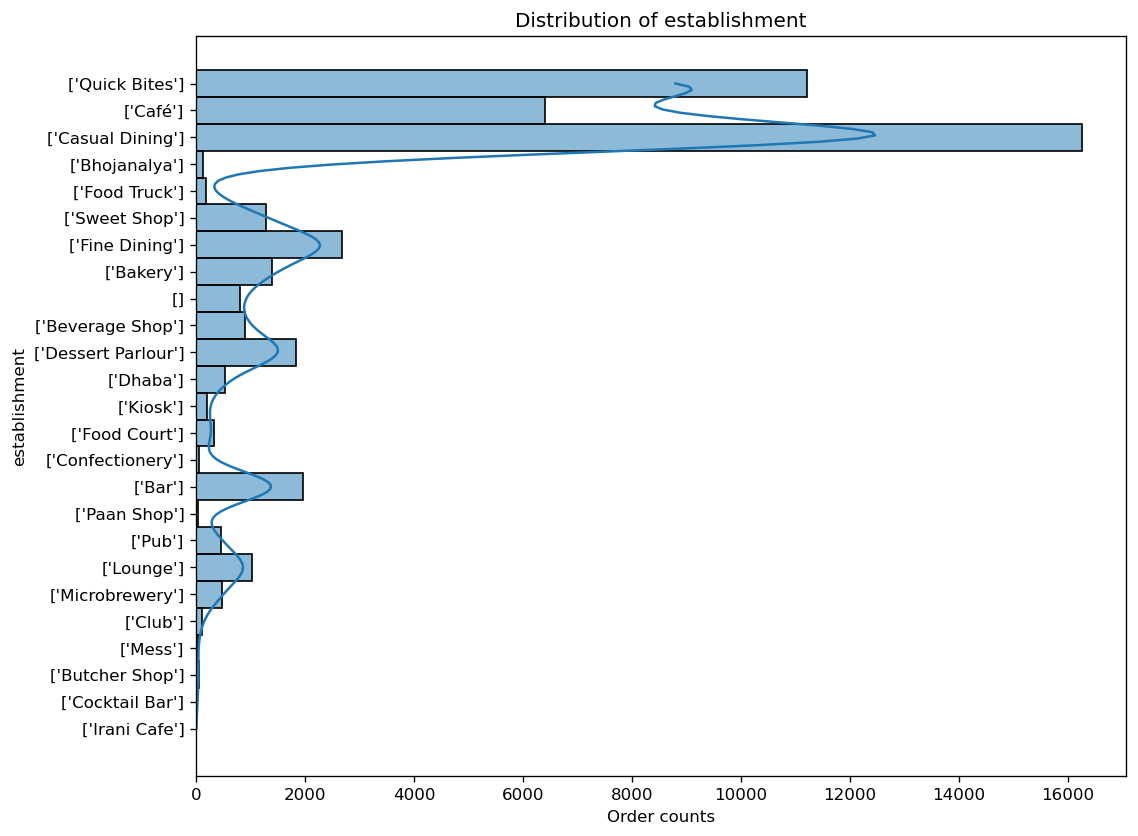

In [42]:
plt.figure(figsize=(10, 8), dpi=120)
sns.histplot(data=zomato_clean,
             y='establishment',
             bins=35,
             kde=True)
plt.xlabel('Order counts')
plt.title('Distribution of establishment')
plt.show()

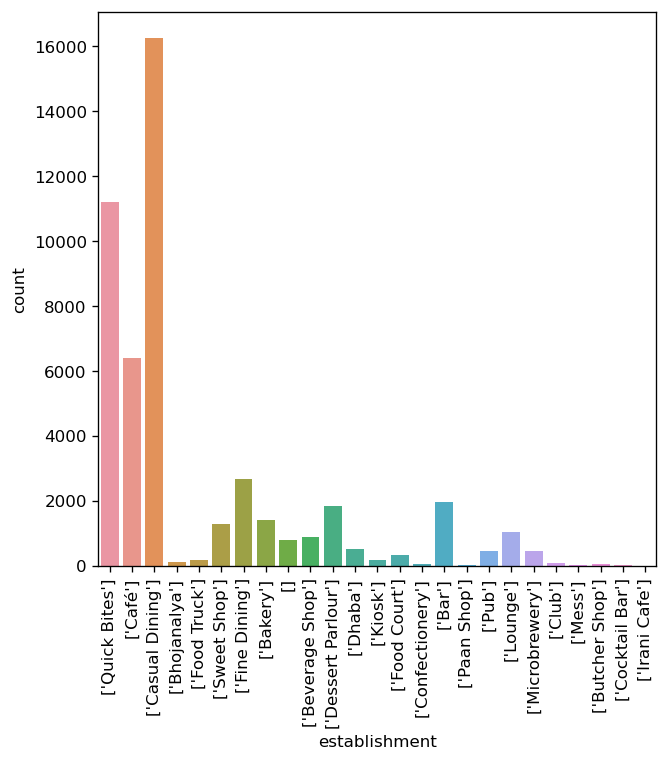

In [43]:
# Outlet_Establishment
plt.figure(figsize=(6,6), dpi=120)
sns.countplot(x='establishment', data=zomato_clean)
plt.xticks(rotation=90)
plt.show()

In [44]:
#city

In [45]:
#Chennai > Mumbai > Banglore

<AxesSubplot:>

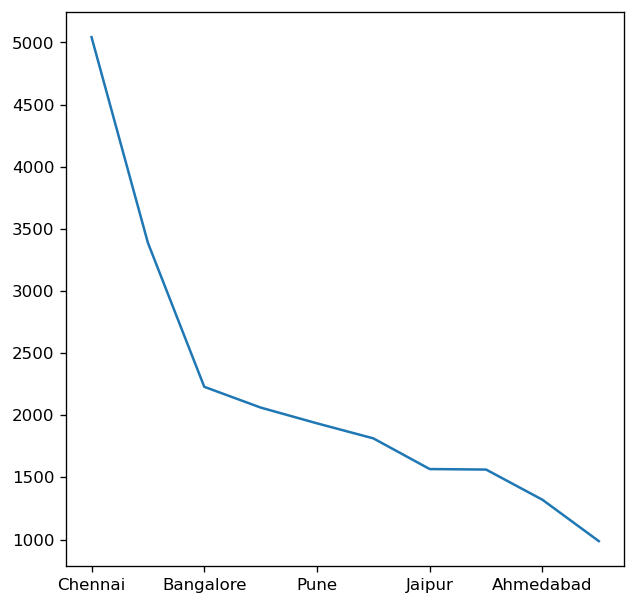

In [46]:
plt.figure(figsize=(6,6), dpi=120)
Top_15_ordering_city[0:10].plot(kind='line')

<AxesSubplot:>

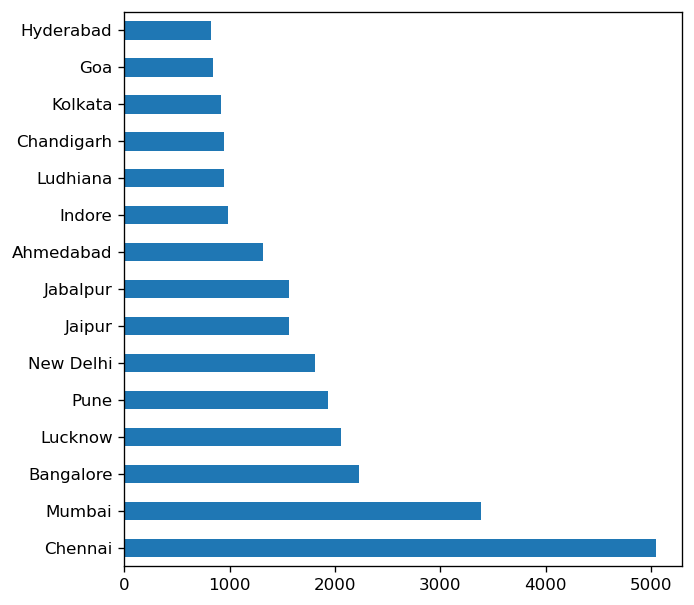

In [47]:
plt.figure(figsize=(6,6), dpi=120)
Top_15_ordering_city.plot(kind='barh')

In [48]:
#lets check distribution of all city

<AxesSubplot:xlabel='count', ylabel='city'>

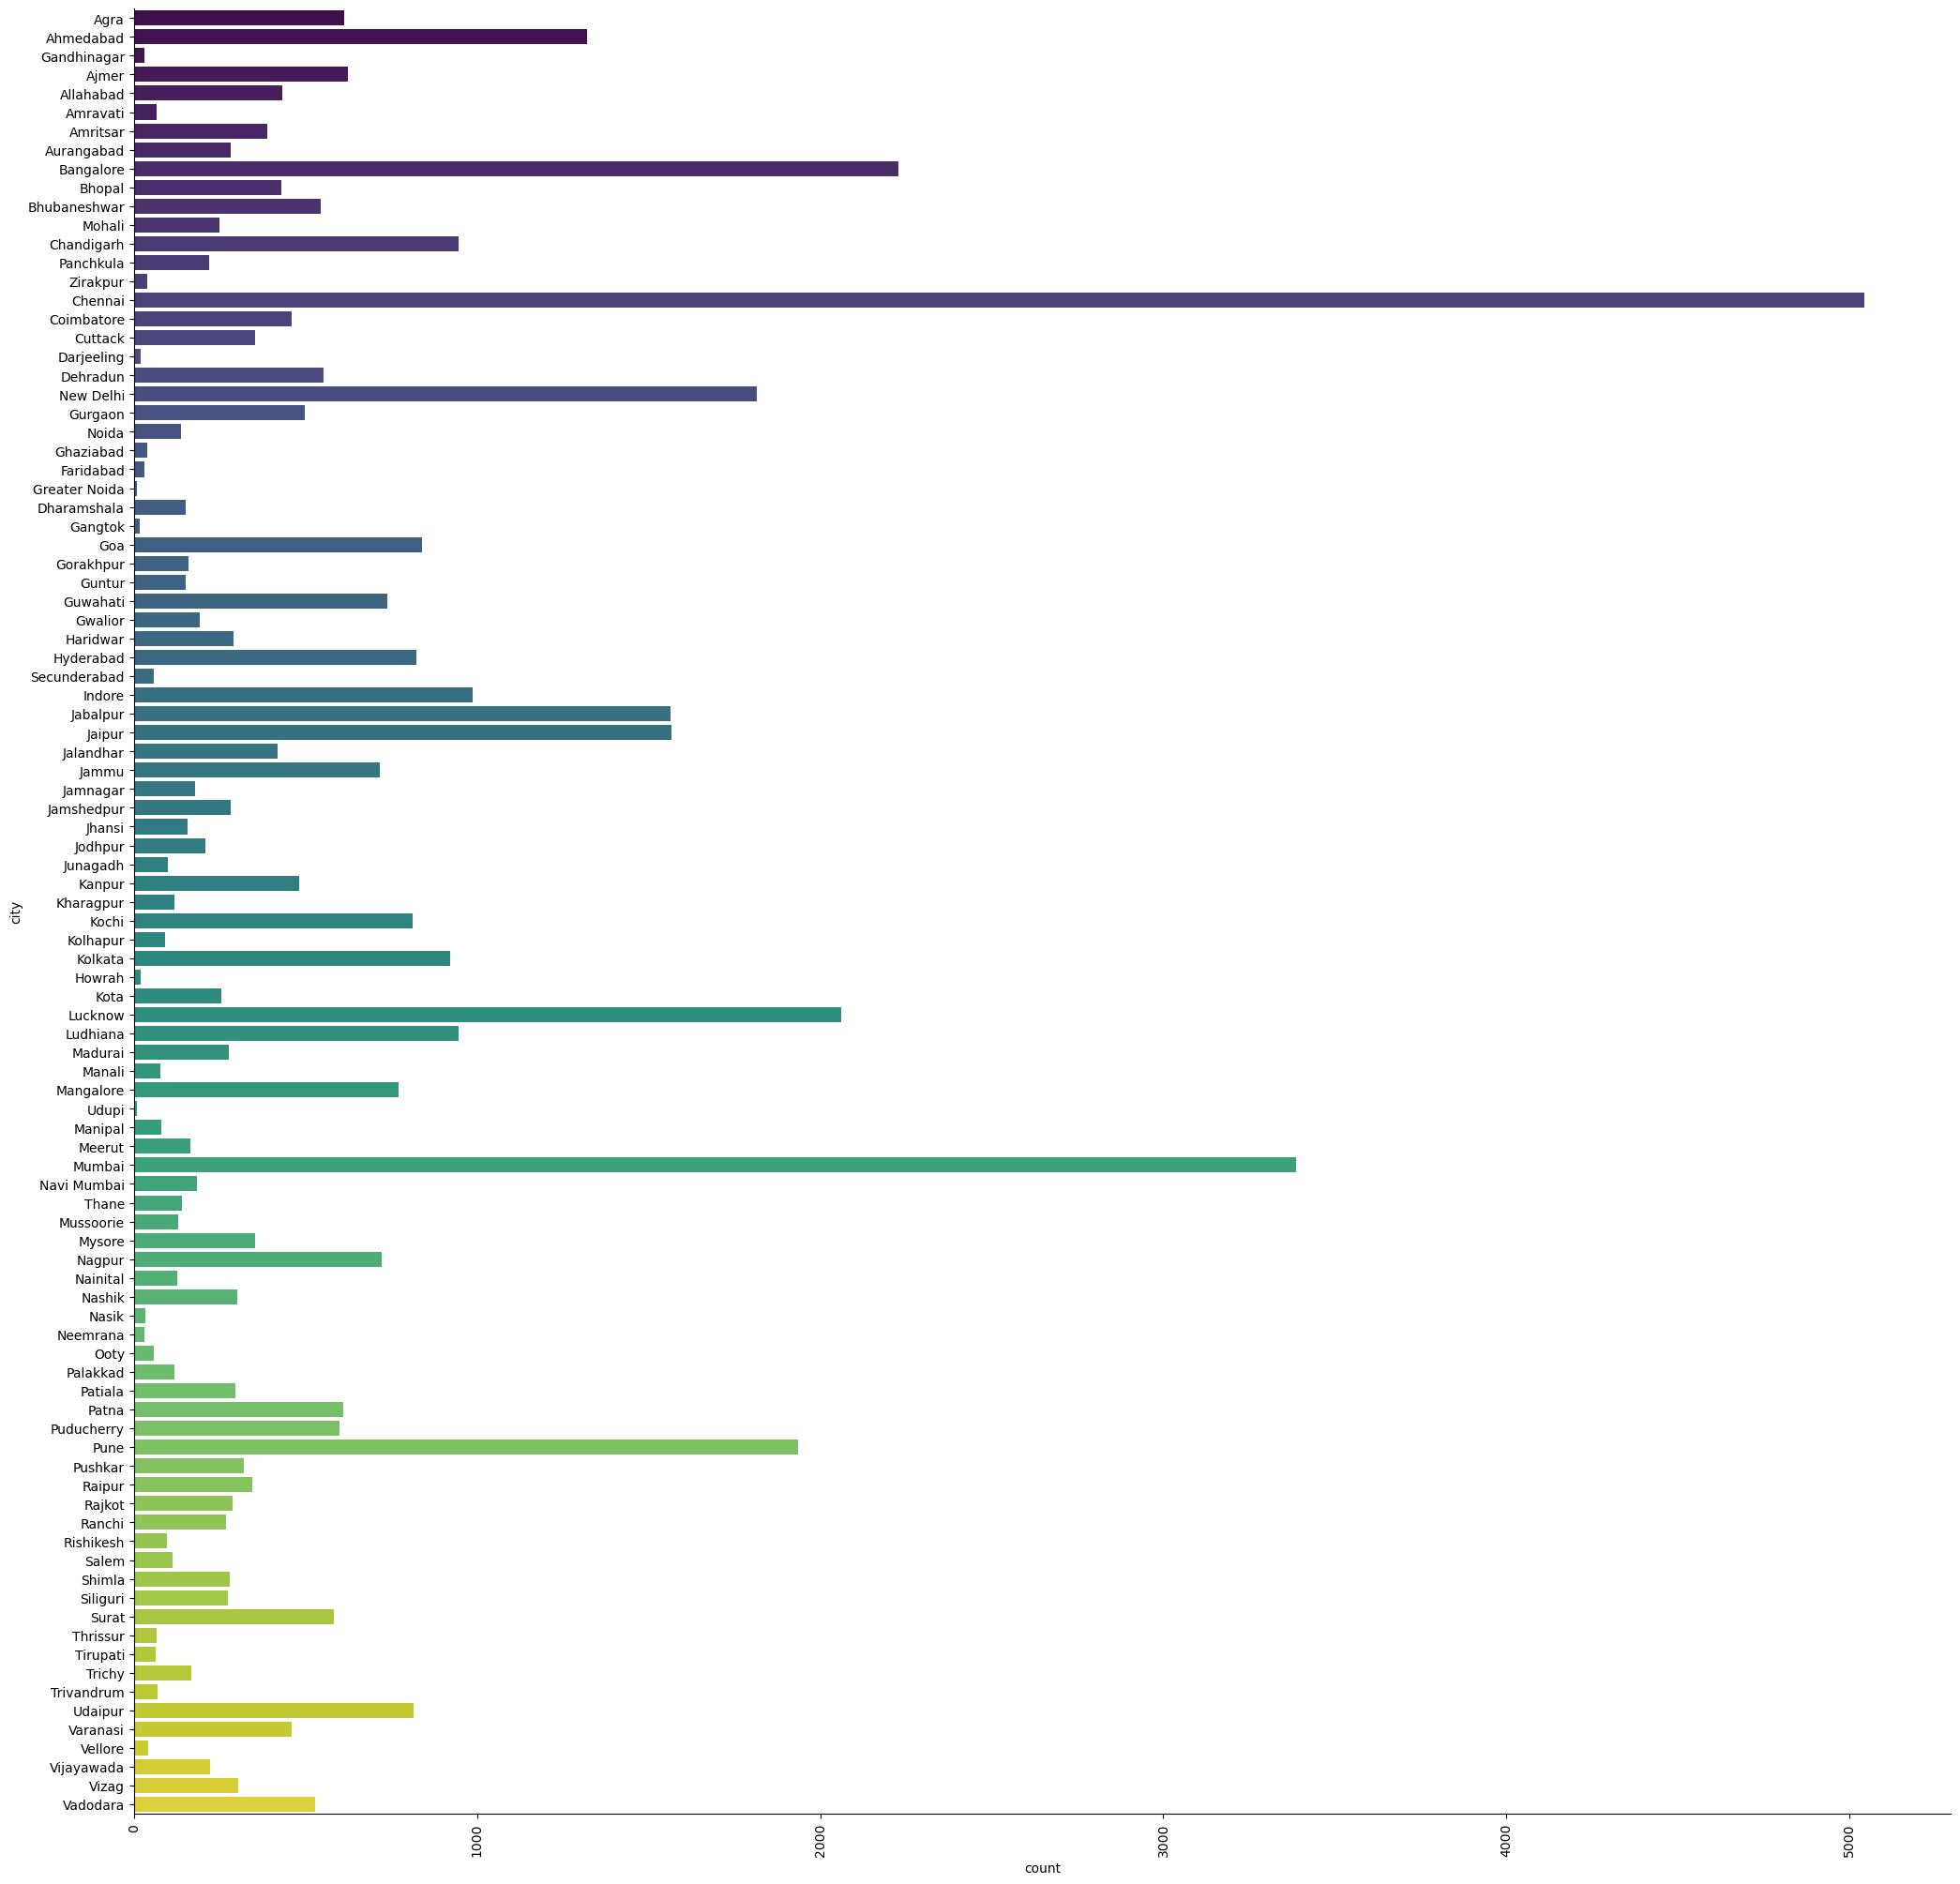

In [49]:
f, ax = plt.subplots(figsize=(25, 25))
plt.xticks(rotation=90)
sns.despine(f)
sns.countplot(y='city', data=zomato_clean, palette='viridis')

In [50]:
zomato_clean.columns

Index(['establishment', 'city', 'latitude', 'longitude', 'zipcode',
       'country_id', 'locality_verbose', 'cuisines', 'timings',
       'average_cost_for_two', 'rating_text'],
      dtype='object')

In [51]:
#Cusines

In [52]:
#North Indian and South Indian food

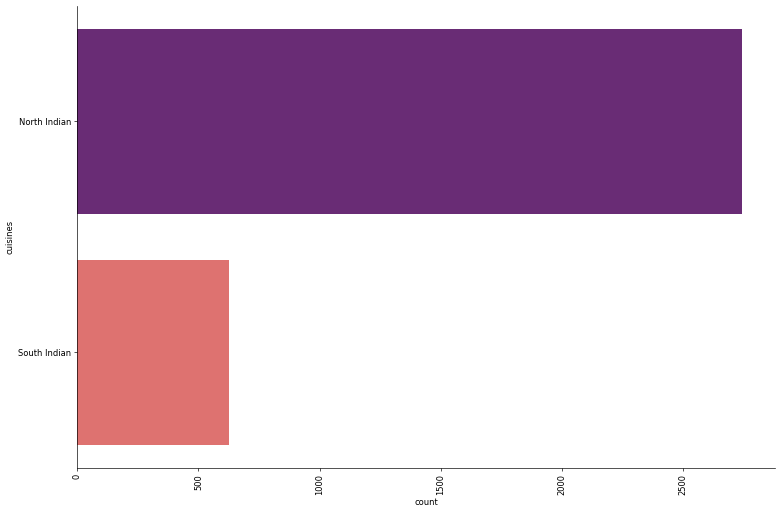

In [53]:
f, ax = plt.subplots(figsize=(15, 10),dpi=60)
plt.xticks(rotation=90)
sns.despine(f)
sns.countplot(y='cuisines', data=Indian_cuisine, palette='magma')
plt.show()


In [54]:
#Foreign Cusines

In [55]:
#Chinese > Italian > Continental ==> Foreign cusines which are maximum ordered

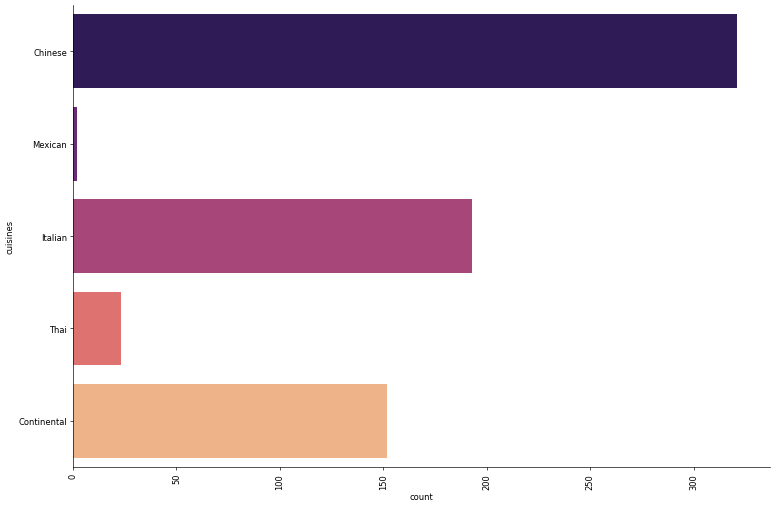

In [56]:
f, ax = plt.subplots(figsize=(15, 10),dpi=60)
plt.xticks(rotation=90)
sns.despine(f)
sns.countplot(y='cuisines', data=Foreign_cuisine, palette='magma')
plt.show()

In [57]:
#Fast food vs Cafe

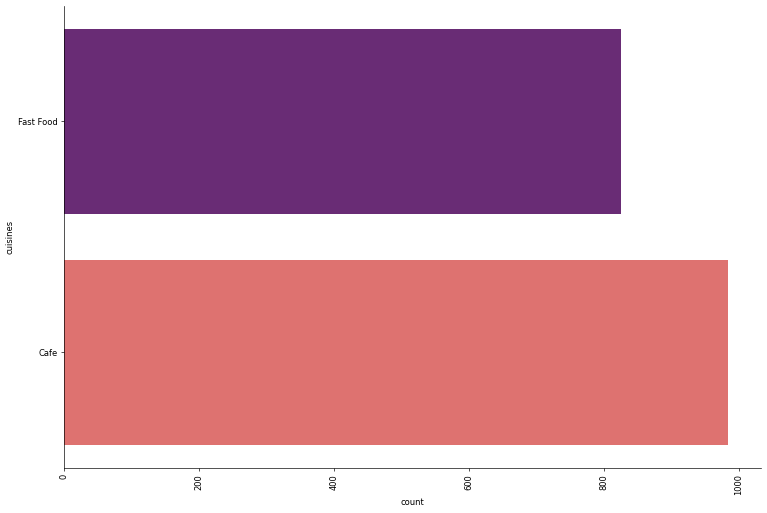

In [58]:
f, ax = plt.subplots(figsize=(15, 10),dpi=60)
plt.xticks(rotation=90)
sns.despine(f)
sns.countplot(y='cuisines', data=dop, palette='magma')
plt.show()

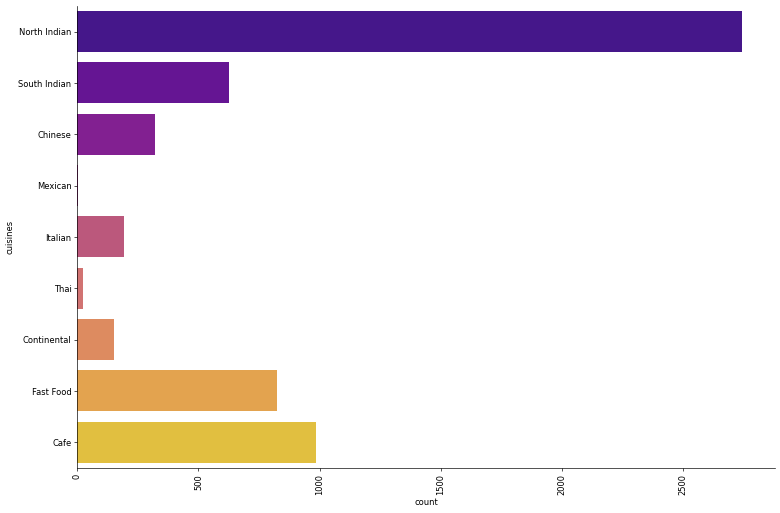

In [59]:
f, ax = plt.subplots(figsize=(15, 10),dpi=60)
plt.xticks(rotation=90)
sns.despine(f)
sns.countplot(y='cuisines', data=All_Top_Cusines, palette='plasma')
plt.show()

In [60]:
#Desserts > Beverages

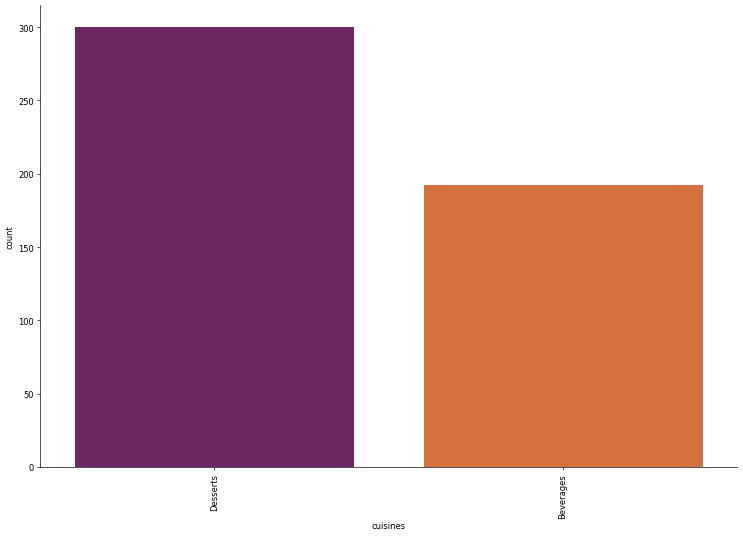

In [61]:
f, ax = plt.subplots(figsize=(15, 10),dpi=60)
plt.xticks(rotation=90)
sns.despine(f)
sns.countplot(x='cuisines', data=Bev_vs_Dess, palette='inferno')
plt.show()

In [62]:
#Reviews

In [63]:
zomato_clean["rating_text"].unique()

array(['Very Good', 'Good', 'Excellent', 'Average', 'Not rated',
       'Excelente', 'Bardzo dobrze', 'Poor', 'Wybitnie', 'Ottimo',
       'Muito Bom', 'Muy Bueno', 'İyi', 'Çok iyi', 'Sangat Baik', 'Baik',
       'Harika', 'Skvělé', 'Bueno', 'Velmi dobré', 'Eccellente', 'Bom',
       'Dobrze', 'Buono', 'Média', 'Skvělá volba', 'Veľmi dobré',
       'Terbaik', 'Průměr', 'Dobré', 'Muito bom', 'Media'], dtype=object)

In [64]:
#Good_reviews

<AxesSubplot:title={'center':'GOOD ratings given'}, ylabel='city'>

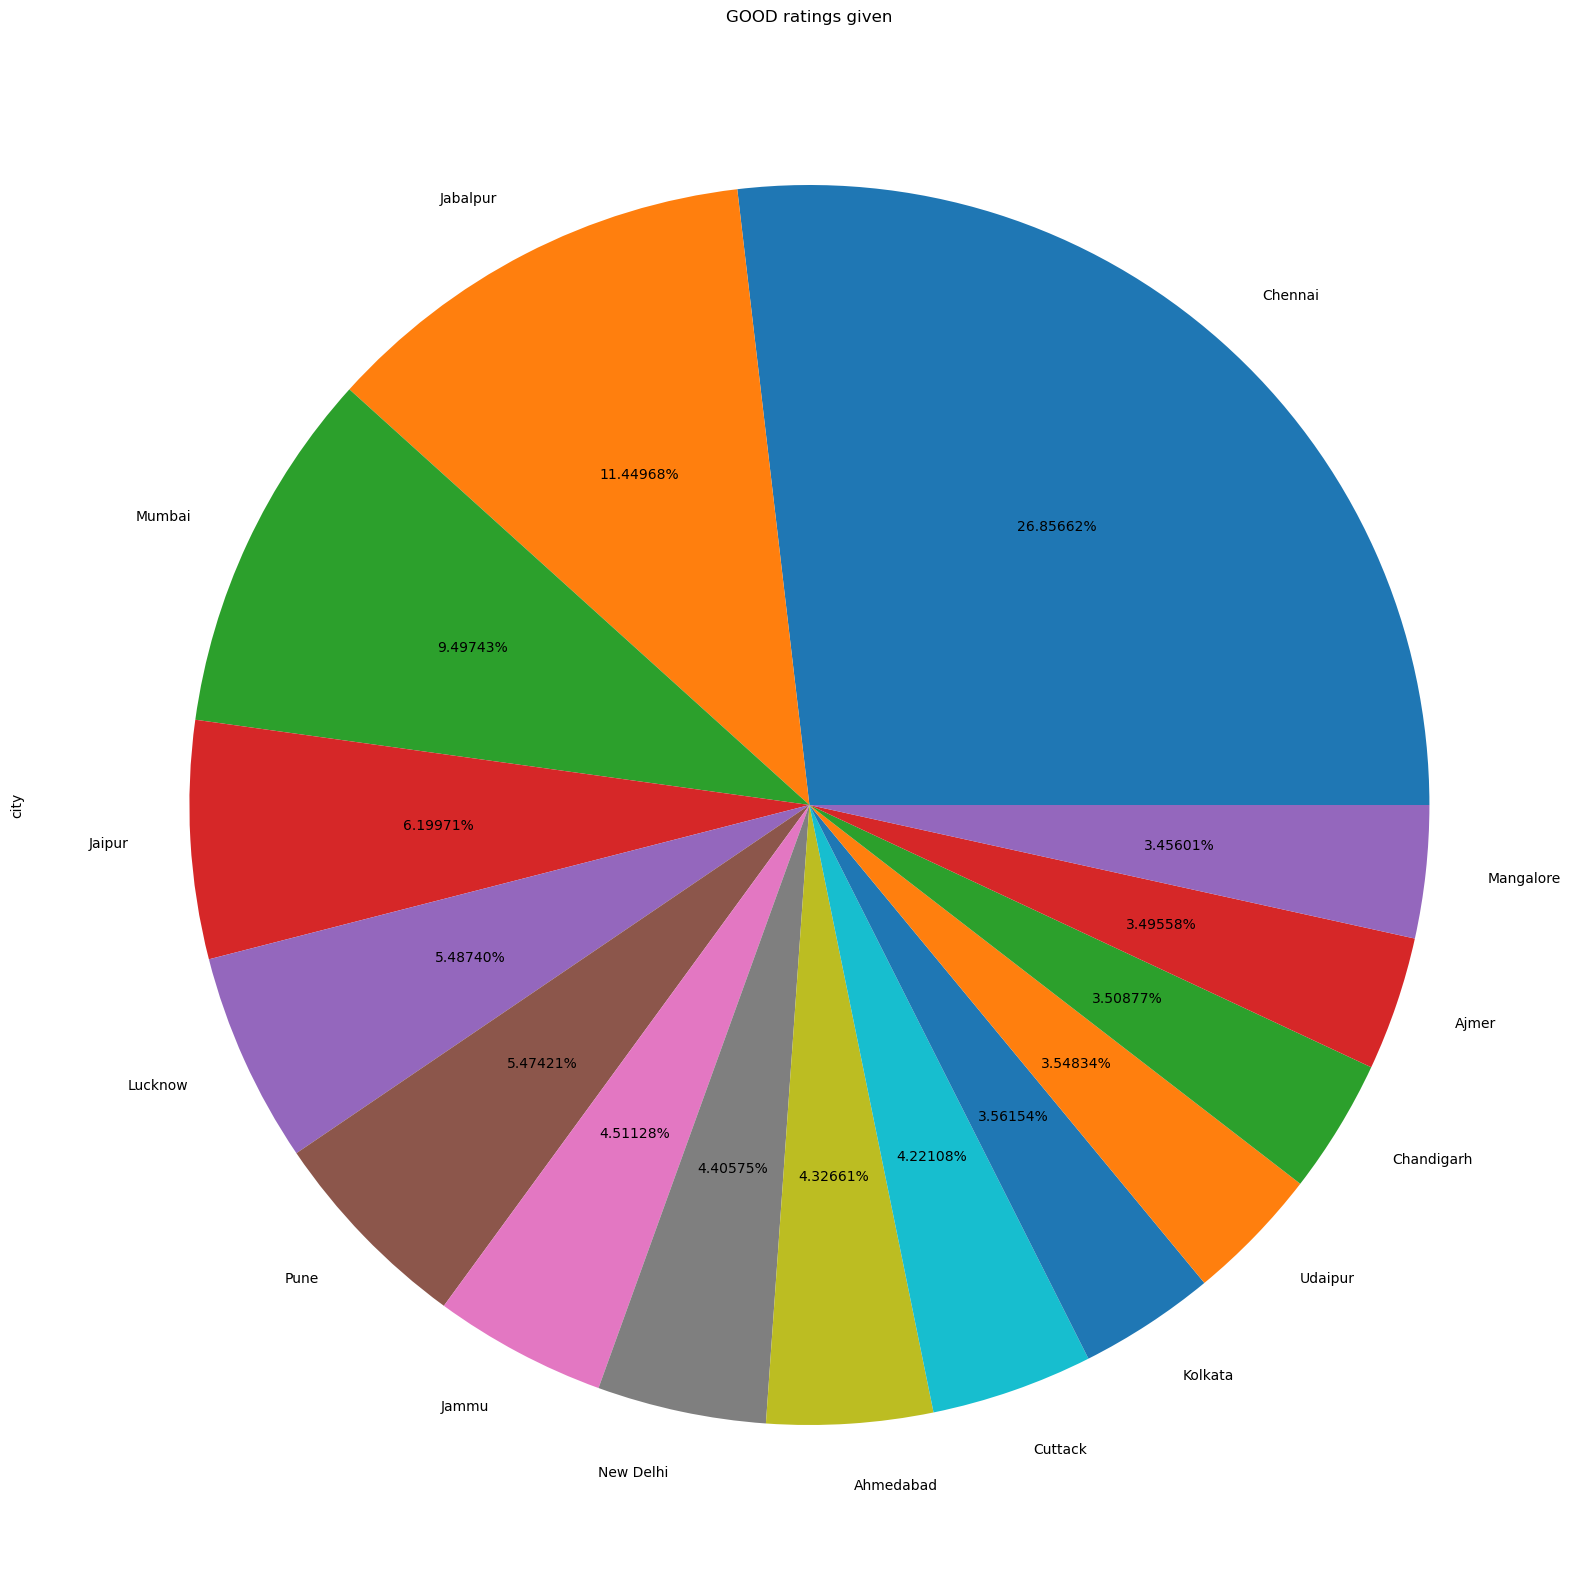

In [65]:
plt.subplots(figsize=(20, 25))
zomato_clean[zomato_clean["rating_text"]=="Good"]["city"].value_counts()[:15].plot.pie(autopct='%1.5f%%',figsize=(20,35),title='GOOD ratings given') #plot

In [66]:
#Poor_Rating

<AxesSubplot:title={'center':'POOR ratings given'}, ylabel='city'>

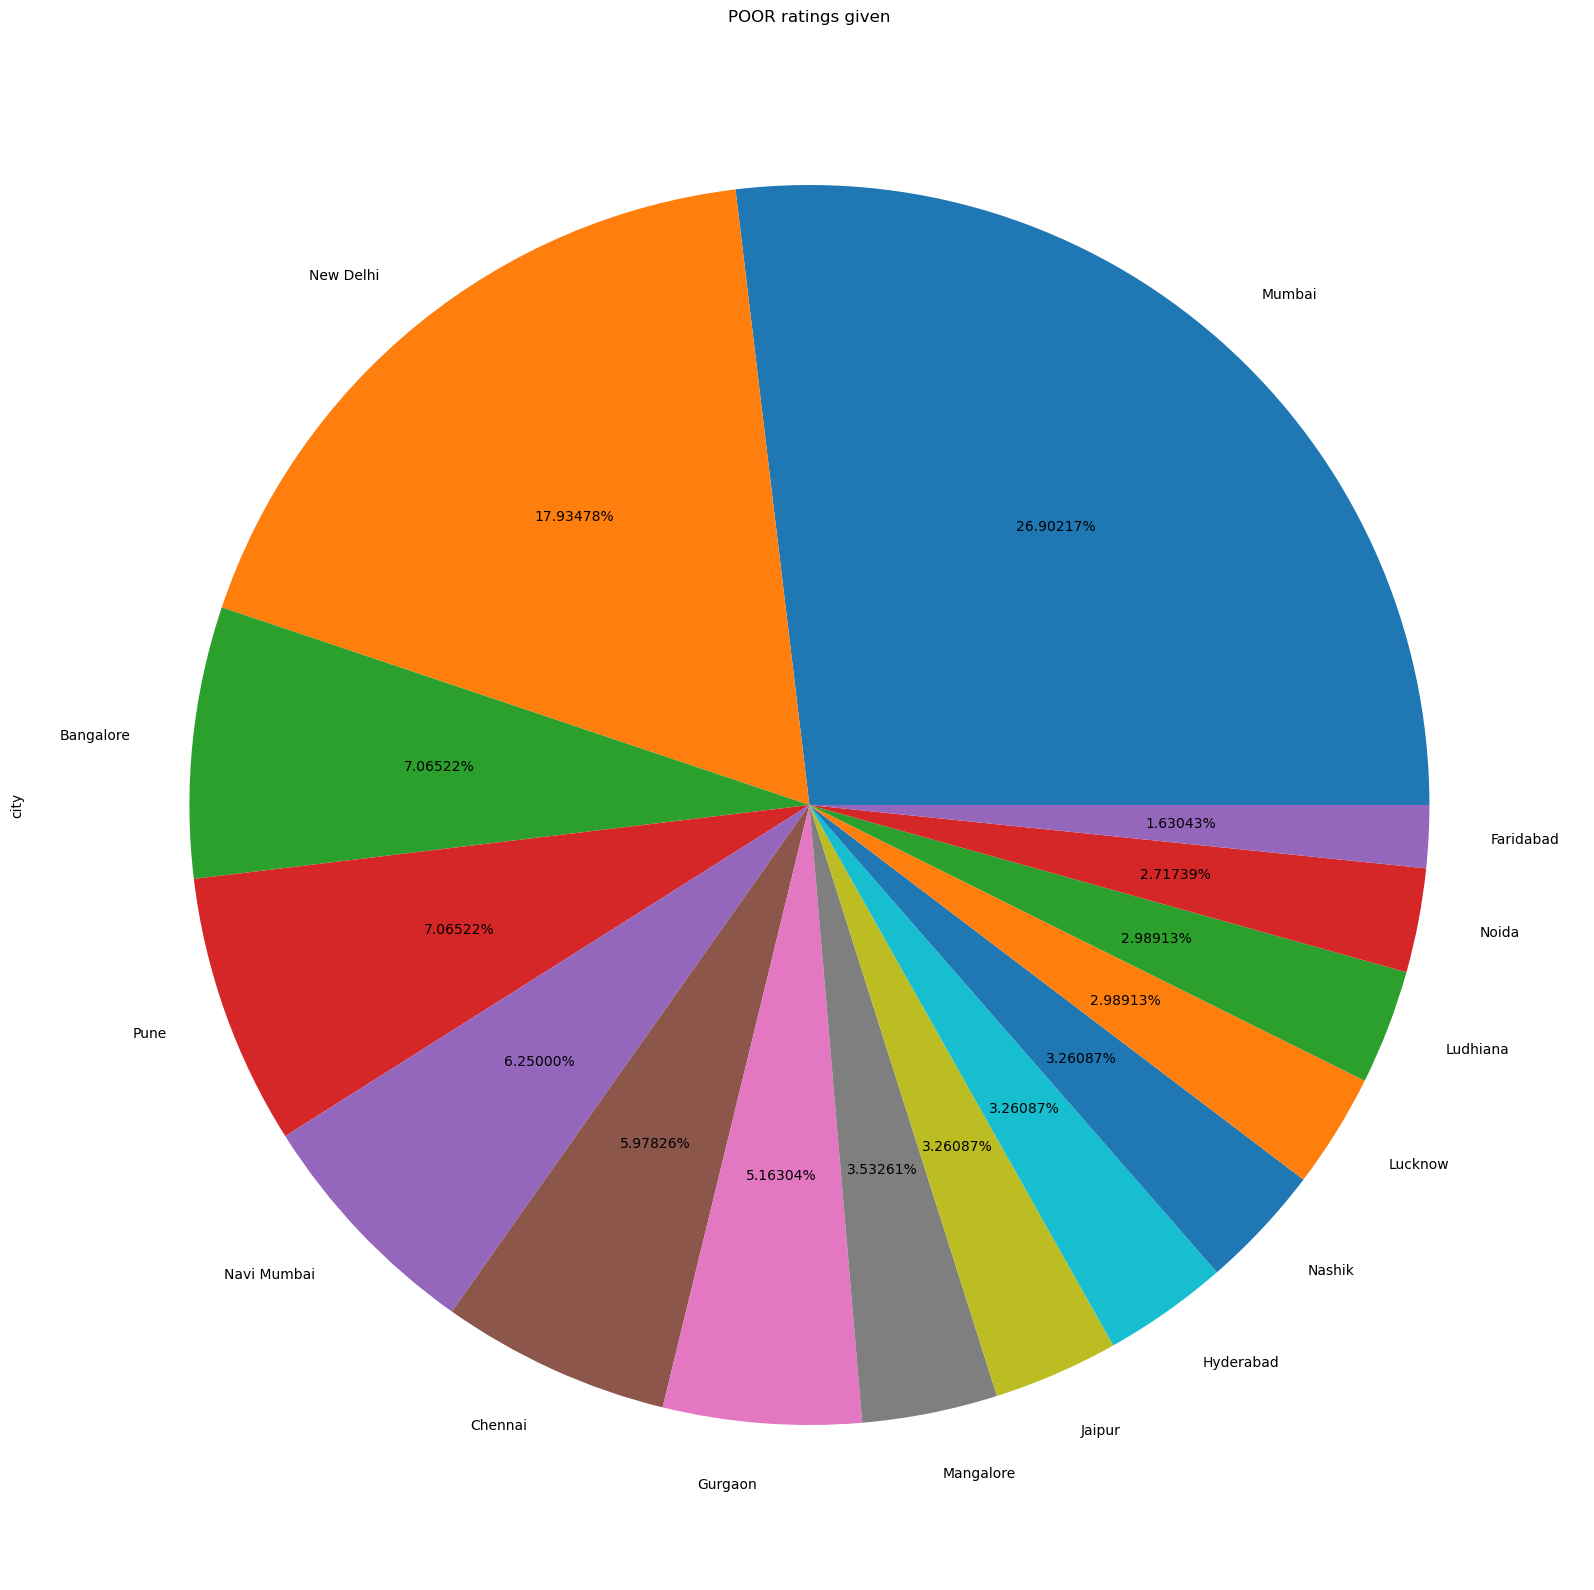

In [67]:
plt.subplots(figsize=(20, 25))
zomato_clean[zomato_clean["rating_text"]=="Poor"]["city"].value_counts()[:15].plot.pie(autopct='%1.5f%%',figsize=(20,35),title='POOR ratings given') #plot

In [68]:
#reviews/ratings

<AxesSubplot:title={'center':'Cities given Good as Food Ratings'}>

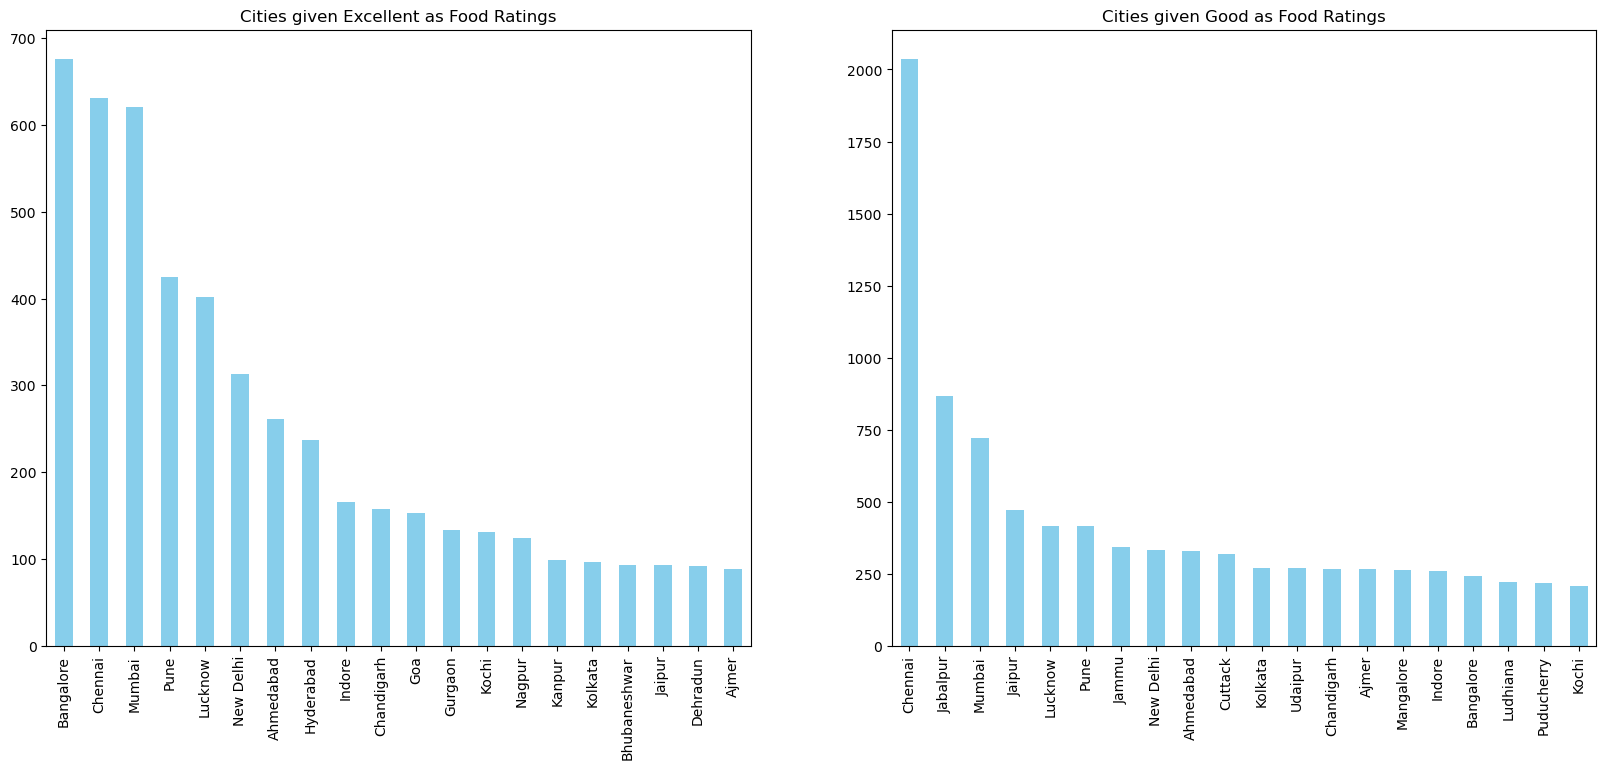

In [69]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
zomato_clean[zomato_clean["rating_text"]=="Excellent"]["city"].value_counts()[:20].plot(kind="bar",color="Skyblue",title='Cities given Excellent as Food Ratings',)

plt.subplot(1,2,2)
zomato_clean[zomato_clean["rating_text"]=="Good"]["city"].value_counts()[:20].plot(kind="bar",color="Skyblue",title='Cities given Good as Food Ratings')

<AxesSubplot:title={'center':'Not RATED'}>

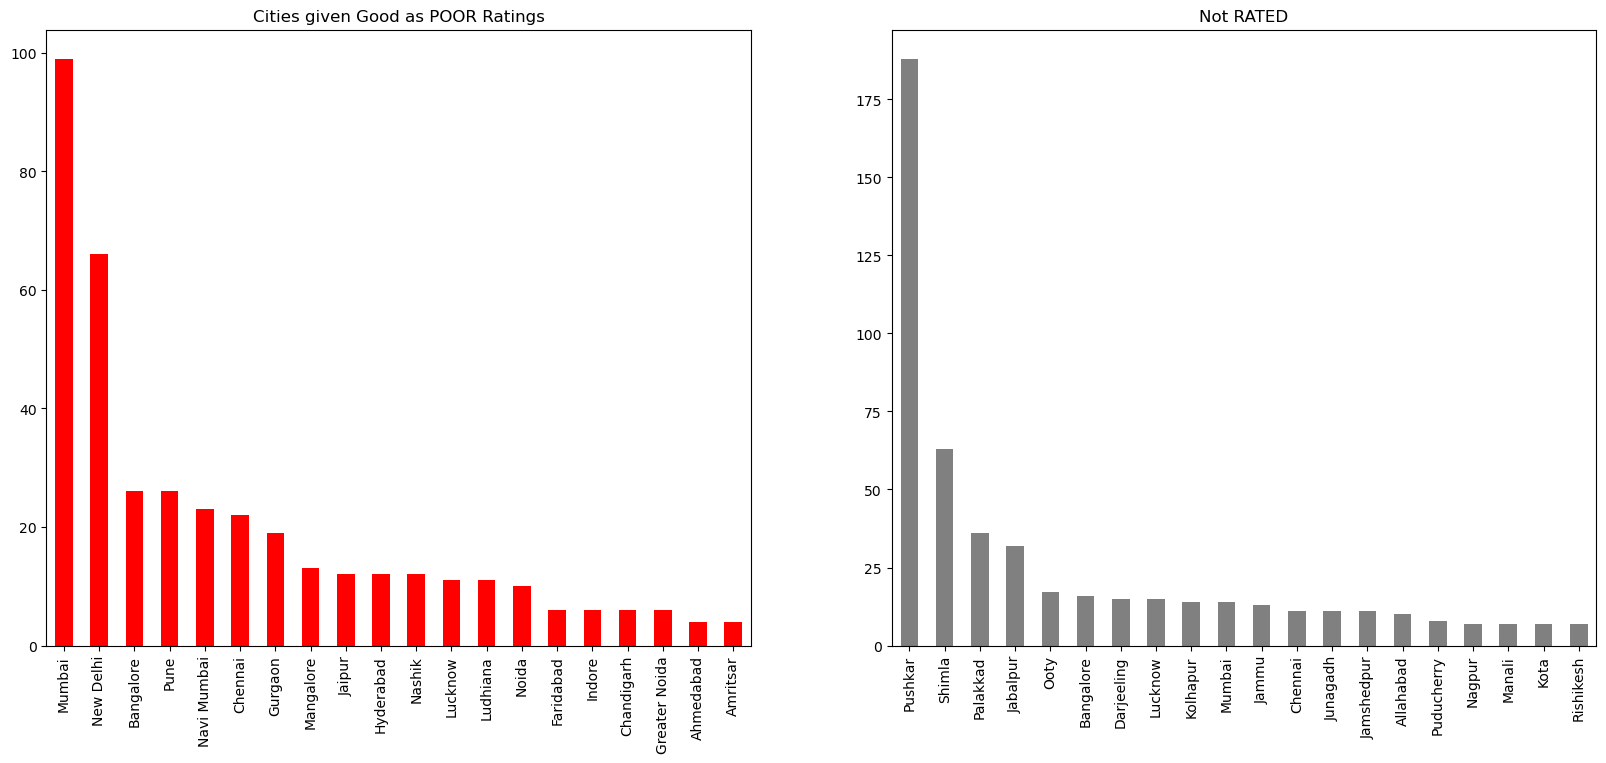

In [70]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
zomato_clean[zomato_clean["rating_text"]=="Poor"]["city"].value_counts()[:20].plot(kind="bar",color="Red" ,title='Cities given Good as POOR Ratings')

plt.subplot(1,2,2)
zomato_clean[zomato_clean["rating_text"]=="Not rated"]["city"].value_counts()[:20].plot(kind="bar",color="grey",title='Not RATED')

# > ***Conclusion***

* #QUICK-BITES --> Top estbalished #Chennai > Mumbai > Banglore are ordered most 
* #Nayangaon and Greater noida ordered least time
* #North indian Food /cuisines ordered most of the time 
* #Foreign Cuisines ----> 1-Chinese food prefered most over Italian , continental and Mexican 2-Chinese > Italian > Continental > Mexican > Thai 
* #Chennai users given GOOD ratings most of the time
* #Allaphuza---> most of the users NOT RATED